In [1]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime

In [24]:
def DisplayGraphWithInfos(array, infos, title, axs, axy, axn, fig):
    x_lims = list()
    x_lims.append(infos[0]+datetime.timedelta(hours=16))
    x_lims.append(x_lims[0]+datetime.timedelta(days=infos[7]))
    x_lims = mdates.date2num(x_lims)
    axs[axy][axn].xaxis_date()
    axs[axy][axn].imshow(array, origin='lower', cmap=plt.get_cmap('jet',20) , aspect='auto',extent=[x_lims[0],x_lims[1],infos[2],infos[1]])
    x_lims = mdates.DateFormatter("%H:%M")
    axs[axy][axn].xaxis.set_major_formatter(x_lims)
    axs[axy][axn].set_title("{} -- {}/{}/{}".format(title, infos[0].year, infos[0].month, infos[0].day))
    axs[axy][axn].set_xlabel("Time")
    axs[axy][axn].set_ylabel("Latitude")
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'), norm=plt.Normalize(vmin=infos[6], vmax=infos[5]))
    sm._A = []
    clb=fig.colorbar(sm, ax=axs[axy][axn])
    clb.set_label("nT")

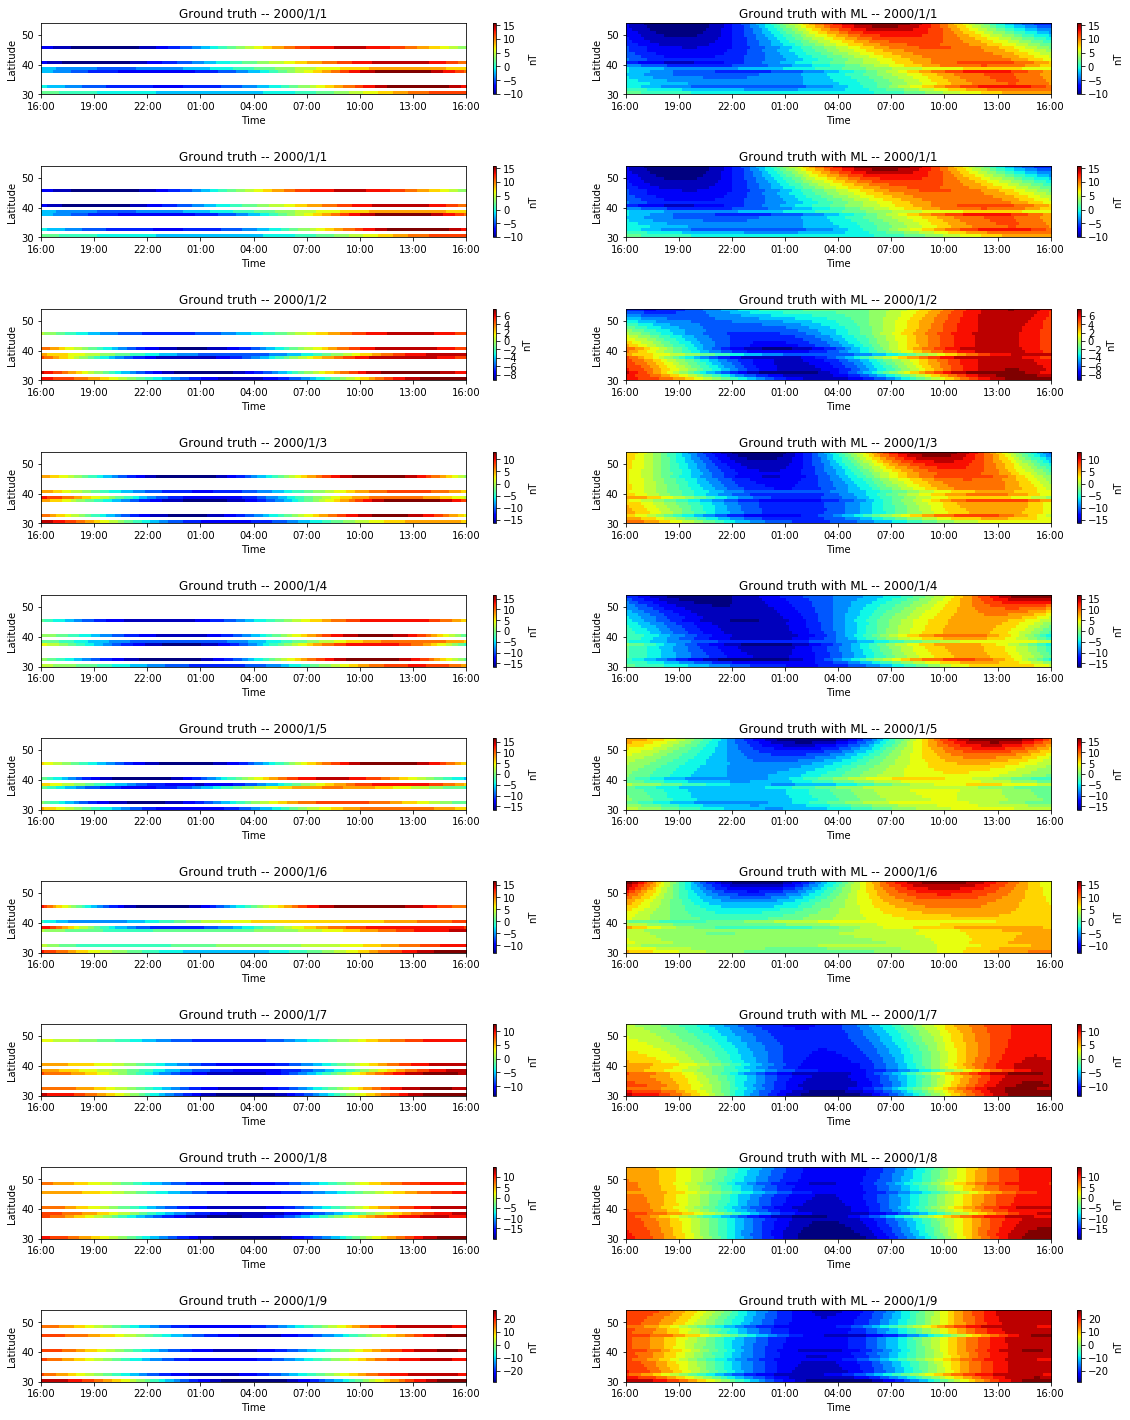

In [25]:
epoch = 0
localFileName = "../TrainingDataset/x_train/"
mountFileName = '../../../Desktop/IRAP_mount/TrainingDataset/x_train/'
numberOfPlots = 10
fig, axs = plt.subplots(numberOfPlots,2, figsize=(25, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1., wspace=.1)

axs = axs.ravel().reshape(numberOfPlots,2)
fig.set_size_inches(20,25)

for i in range(numberOfPlots):
    trainingArray = np.load('{}y2_{}.npy'.format(localFileName, epoch+i), allow_pickle=True, encoding="latin1")
    DisplayGraphWithInfos(trainingArray[0], trainingArray[2], "Ground truth", axs, i, 0, fig)
    DisplayGraphWithInfos(trainingArray[1], trainingArray[2], "Ground truth with ML", axs, i, 1, fig)

fig.show()
fig.savefig("DisplayDataset.png")